<a href="https://colab.research.google.com/github/muhsintsn/Machine-Learning/blob/main/9266_DL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df = df.drop(['RowNumber',"CustomerId","Surname"],axis = 1)

In [ ]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1


In [ ]:
df.CreditScore.value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

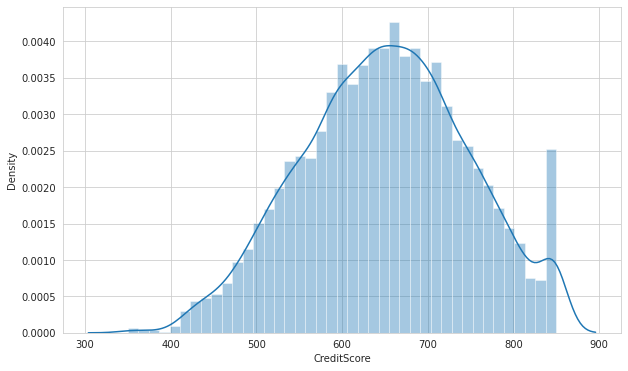

In [ ]:
sns.distplot(df['CreditScore']);

In [ ]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.Age.value_counts()							

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [ ]:
df.Tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
df.Balance.value_counts()

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: Balance, Length: 6382, dtype: int64

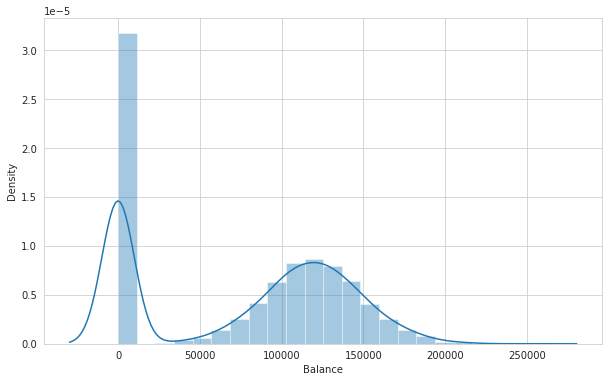

In [ ]:
sns.distplot(df['Balance']);

In [ ]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
df.EstimatedSalary.value_counts()

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: EstimatedSalary, Length: 9999, dtype: int64

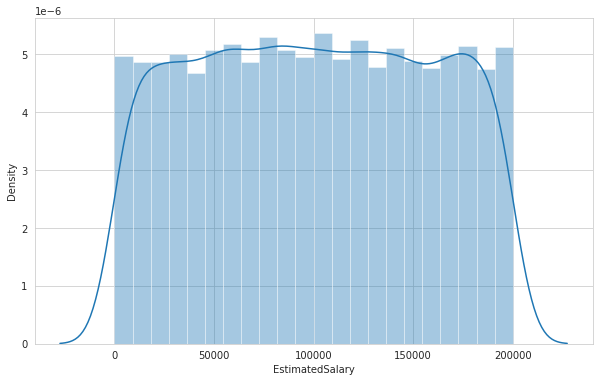

In [ ]:
sns.distplot(df['EstimatedSalary']);

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

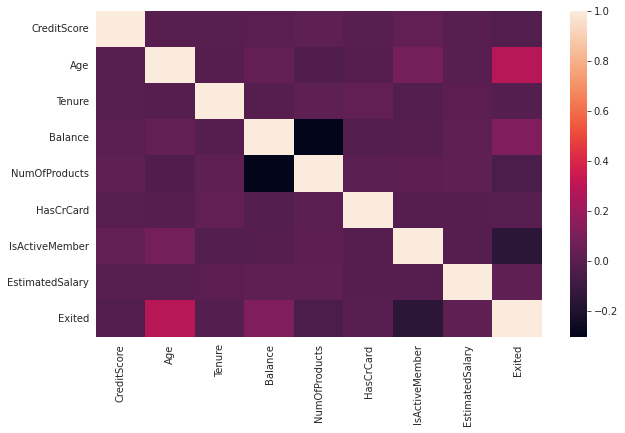

In [ ]:
sns.heatmap(df.corr())

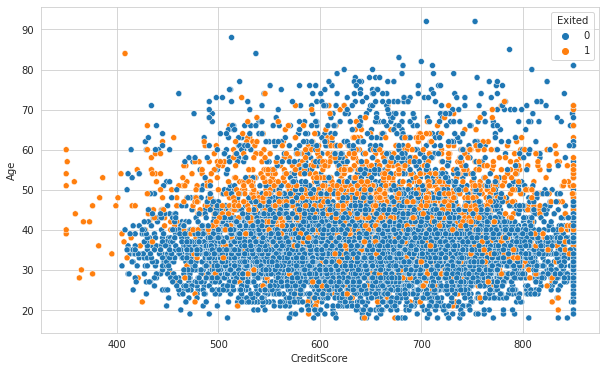

In [ ]:
sns.scatterplot(x = 'CreditScore',y = 'Age', data = df, hue = "Exited");

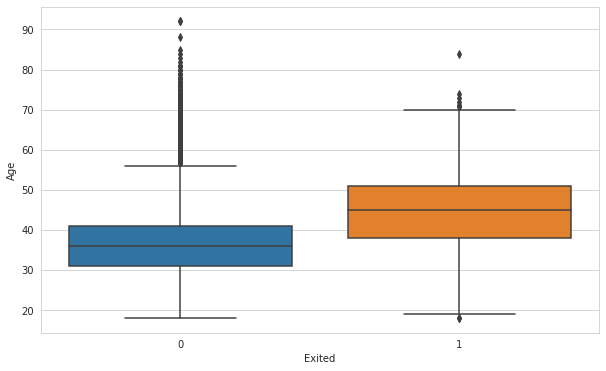

In [ ]:
sns.boxplot(x = 'Exited', y = 'Age', data = df);

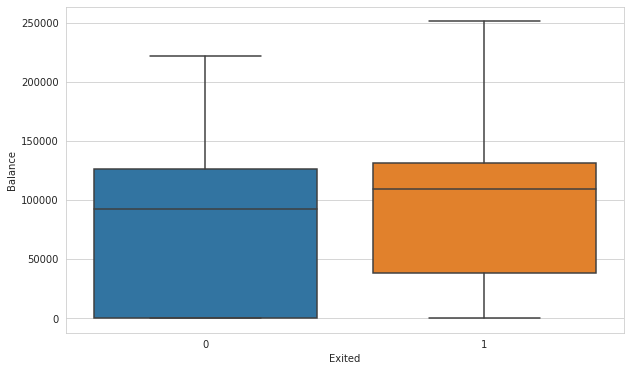

In [ ]:
sns.boxplot(x = 'Exited', y = 'Balance', data = df);

In [ ]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1


In [ ]:
df.shape

(10000, 11)

In [ ]:
Geography_dummy = pd.get_dummies(df["Geography"],prefix = "Geography")
df = pd.concat([df, Geography_dummy], axis = 1)

In [ ]:
Gender_dummy= pd.get_dummies(df["Gender"])
df = pd.concat([df, Gender_dummy], axis = 1)

In [ ]:
df = df.drop(['Geography',"Gender"],axis = 1)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Female,Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,1,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,1,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,0,1,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,0,1


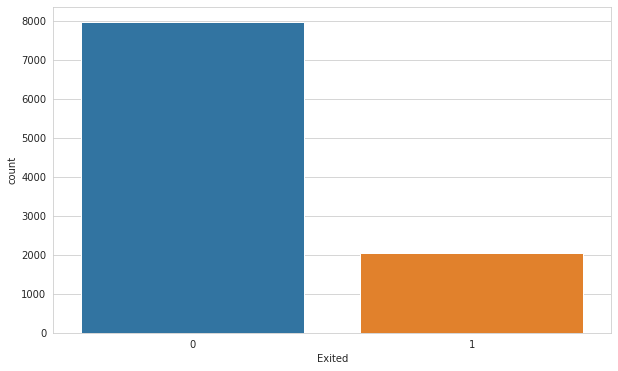

In [ ]:
sns.countplot(df["Exited"])

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Female             10000 non-null  uint8  
 13  Male               10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


## Preprocessing of Data
- Train | Test Split, Scalling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
seed = 42
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

### Creating Model

In [ ]:
X_train.shape

(9000, 13)

In [ ]:
X_test.shape

(1000, 13)

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### without class_weigth

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.4960 - accuracy: 0.7935 - val_loss: 0.4719 - val_accuracy: 0.8022
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4599 - accuracy: 0.7965 - val_loss: 0.4558 - val_accuracy: 0.7911
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.8079 - val_loss: 0.4337 - val_accuracy: 0.8156
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4270 - accuracy: 0.8180 - val_loss: 0.4158 - val_accuracy: 0.8256
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4135 - accuracy: 0.8227 - val_loss: 0.4167 - val_accuracy: 0.8189
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8269 - val_loss: 0.3929 - val_accuracy: 0.8356
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8333 - val_loss: 0.3814 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.496,0.793,0.472,0.802
1,0.460,0.797,0.456,0.791
2,0.442,0.808,0.434,0.816
3,0.427,0.818,0.416,0.826
4,0.414,0.823,0.417,0.819


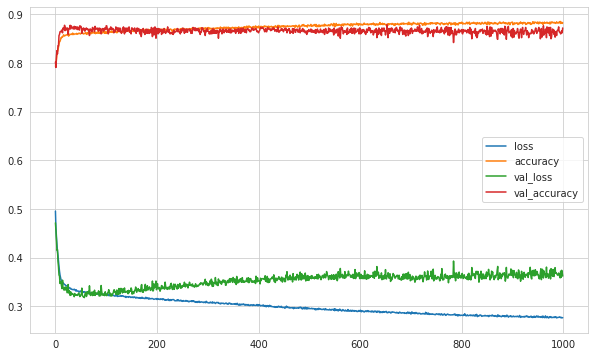

In [ ]:
loss_df.plot();

#### Evaluate

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[0.38537663221359253, 0.8560000061988831]

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.38537663221359253
accuracy :  0.8560000061988831


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  46]
 [ 98  91]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       811
           1       0.66      0.48      0.56       189

    accuracy                           0.86      1000
   macro avg       0.78      0.71      0.74      1000
weighted avg       0.84      0.86      0.85      1000



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4960 - accuracy: 0.7935 - val_loss: 0.4719 - val_accuracy: 0.8022
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.7965 - val_loss: 0.4558 - val_accuracy: 0.7911
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.8079 - val_loss: 0.4337 - val_accuracy: 0.8156
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4270 - accuracy: 0.8180 - val_loss: 0.4158 - val_accuracy: 0.8256
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8227 - val_loss: 0.4167 - val_accuracy: 0.8189
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8269 - val_loss: 0.3929 - val_accuracy: 0.8356
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3928 - accuracy: 0.8333 - val_loss: 0.3814 - val_accuracy:

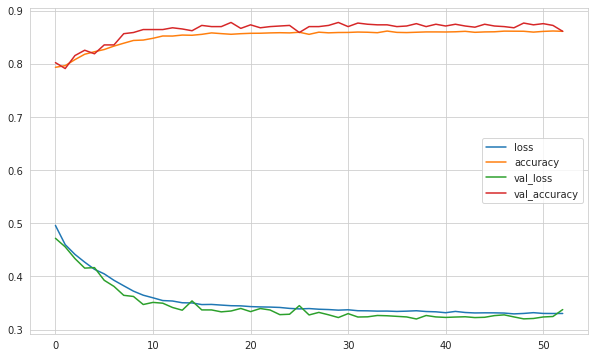

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3435644209384918
accuracy :  0.8600000143051147


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[755  56]
 [ 84 105]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       811
           1       0.65      0.56      0.60       189

    accuracy                           0.86      1000
   macro avg       0.78      0.74      0.76      1000
weighted avg       0.85      0.86      0.86      1000



In [ ]:
# Learning Reate

In [ ]:
from tensorflow.keras.optimizers import Adam


In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8605 - val_loss: 0.3276 - val_accuracy: 0.8700
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8643 - val_loss: 0.3362 - val_accuracy: 0.8667
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8620 - val_loss: 0.3448 - val_accuracy: 0.8633
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3252 - accuracy: 0.8642 - val_loss: 0.3339 - val_accuracy: 0.8711
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3245 - accuracy: 0.8637 - val_loss: 0.3569 - val_accuracy: 0.8589
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8623 - val_loss: 0.3394 - val_accuracy: 0.8722
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8644 - val_loss: 0.3420 - val_accuracy:

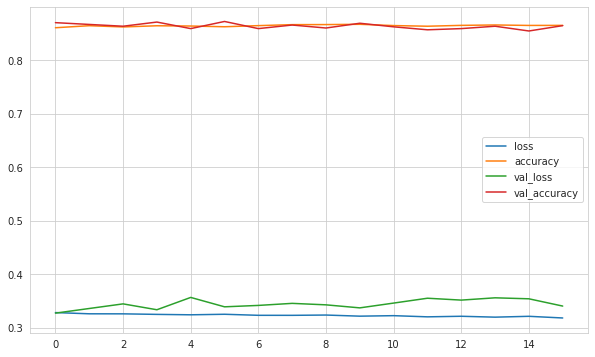

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34026604890823364
accuracy :  0.8640000224113464


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[784  27]
 [109  80]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       811
           1       0.75      0.42      0.54       189

    accuracy                           0.86      1000
   macro avg       0.81      0.69      0.73      1000
weighted avg       0.85      0.86      0.85      1000



In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.5532 - accuracy: 0.7762 - val_loss: 0.4859 - val_accuracy: 0.8033
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5087 - accuracy: 0.7921 - val_loss: 0.4750 - val_accuracy: 0.8033
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.7940 - val_loss: 0.4646 - val_accuracy: 0.8033
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.7937 - val_loss: 0.4639 - val_accuracy: 0.8033
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.7937 - val_loss: 0.4552 - val_accuracy: 0.8033
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4759 - accuracy: 0.7951 - val_loss: 0.4522 - val_accuracy: 0.8033
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.7967 - val_loss: 0.4480 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3380560874938965
accuracy :  0.8610000014305115


### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [ ]:
"""# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))"""

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [161]:
def create_model(init_mode='uniform'):

	model = Sequential()
	model.add(Dense(12, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))

	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [162]:
seed = 42
numpy.random.seed(seed)

In [163]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [164]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [165]:
grid_result = grid.fit(X_train, y_train)

#### Evaluate

In [166]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857222 using {'init_mode': 'lecun_uniform'}
0.836556 (0.006999) with: {'init_mode': 'uniform'}
0.857222 (0.004629) with: {'init_mode': 'lecun_uniform'}
0.835889 (0.009523) with: {'init_mode': 'normal'}
0.794667 (0.003475) with: {'init_mode': 'zero'}
0.856333 (0.002228) with: {'init_mode': 'glorot_normal'}
0.854444 (0.005820) with: {'init_mode': 'glorot_uniform'}
0.856111 (0.003823) with: {'init_mode': 'he_normal'}
0.855000 (0.004082) with: {'init_mode': 'he_uniform'}


## GridSearchCV

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [ ]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [ ]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 0.4736 - accuracy: 0.7944 - val_loss: 0.4488 - val_accuracy: 0.8000
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8127 - val_loss: 0.4031 - val_accuracy: 0.8211
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8336 - val_loss: 0.3668 - val_accuracy: 0.8578
Epoch 4/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3684 - accuracy: 0.8481 - val_loss: 0.3436 - val_accuracy: 0.8711
Epoch 5/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8523 - val_loss: 0.3440 - val_accuracy: 0.8611
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8530 - val_loss: 0.3352 - val_accuracy: 0.8689
Epoch 7/200
127/127 [==============================] - 0s 3ms/step - loss: 0.35

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe87e221a90>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_model.best_score_

0.859

In [ ]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.005,
 'optimizer': keras.optimizer_v2.nadam.Nadam}

#### Evaluate

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]]
grid_result

,mean_test_score,std_test_score,rank_test_score,params
0,0.858,0.013,3,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
1,0.858,0.011,2,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
2,0.735,0.178,23,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
3,0.854,0.014,18,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.857,0.011,5,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
5,0.855,0.011,14,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
6,0.795,0.011,19,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
7,0.857,0.015,6,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
8,0.856,0.014,9,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
9,0.856,0.016,12,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."


In [ ]:
roc_auc_score(y_test, y_pred)


0.7057555177160603

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3333216905593872
accuracy :  0.8650000095367432


## Final Model and Model Deployment

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.5065 - accuracy: 0.7947 - val_loss: 0.4594 - val_accuracy: 0.8110
Epoch 2/1000
141/141 [==============================] - 1s 4ms/step - loss: 0.4679 - accuracy: 0.7940 - val_loss: 0.4393 - val_accuracy: 0.8130
Epoch 3/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7998 - val_loss: 0.4292 - val_accuracy: 0.8230
Epoch 4/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8114 - val_loss: 0.4139 - val_accuracy: 0.8250
Epoch 5/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8191 - val_loss: 0.4062 - val_accuracy: 0.8300
Epoch 6/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8217 - val_loss: 0.4007 - val_accuracy: 0.8370
Epoch 7/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8289 - val_loss: 0.3959 - val_accuracy:

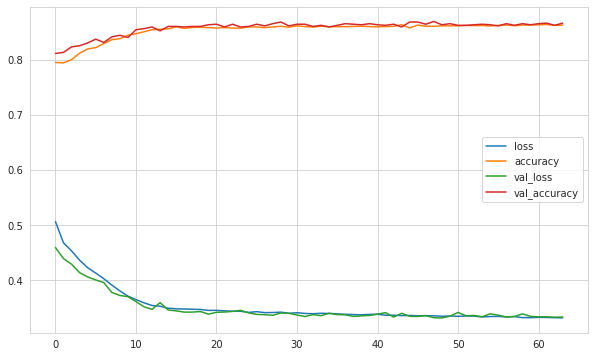

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.333551824092865
accuracy :  0.8659999966621399


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[790  21]
 [113  76]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       811
           1       0.78      0.40      0.53       189

    accuracy                           0.87      1000
   macro avg       0.83      0.69      0.73      1000
weighted avg       0.86      0.87      0.85      1000



In [167]:
## Saving Final Model and Scaler

In [ ]:
import pickle
pickle.dump(scaler, open("scaler_Exited", 'wb'))

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [ ]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
141/141 [==============================] - 2s 6ms/step - loss: 0.5065 - accuracy: 0.7947 - val_loss: 0.4594 - val_accuracy: 0.8110
Epoch 2/1000
141/141 [==============================] - 1s 8ms/step - loss: 0.4679 - accuracy: 0.7940 - val_loss: 0.4393 - val_accuracy: 0.8130
Epoch 3/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7998 - val_loss: 0.4292 - val_accuracy: 0.8230
Epoch 4/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.8114 - val_loss: 0.4139 - val_accuracy: 0.8250
Epoch 5/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8191 - val_loss: 0.4062 - val_accuracy: 0.8300
Epoch 6/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8217 - val_loss: 0.4007 - val_accuracy: 0.8370
Epoch 7/1000
141/141 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8289 - val_loss: 0.3959 - val_accuracy:

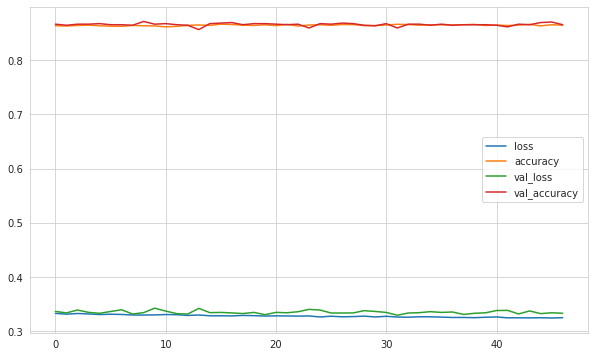

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3333216905593872
accuracy :  0.8650000095367432


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[780  31]
 [104  85]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       811
           1       0.73      0.45      0.56       189

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



In [ ]:
model.save('model_Exited.h5')

In [ ]:
## Loading Model and Scaler

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_Exited = load_model('model_Exited.h5')
scaler_Exited = pickle.load(open("scaler_Exited", "rb"))

### Prediction

In [ ]:
single_patient = df.drop('Exited', axis = 1).iloc[0:1, :]
single_patient

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Female,Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [ ]:
single_patient = scaler_Exited.transform(single_patient)
single_patient

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [ ]:
(model_Exited.predict(single_patient) > 0.5).astype("int32")

array([[0]], dtype=int32)

In [ ]:
df["Exited"].iloc[0]

1

In [ ]:
df.iloc[0:1, :]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Female,Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___